In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("Datasets/train_values.csv").set_index('building_id')

In [3]:
damages = pd.read_csv("Datasets/train_labels.csv").set_index('building_id')

# Association between superstructure and features

Here I wonder if some superstructures are always associated with certain features. Precisely, I am looking for hidden patterns (civil engineering laws or techniques, relation between superstructure and wealth of residents, etc.)

Superstructure X Superstructure

In [4]:
col1 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
twins = pd.DataFrame(index=col1, columns=col2)
done = 0
for i in twins.index:
    for c in twins.columns:
        if i !=c :
            twins.loc[i,c] = df[df[i] ==1 ][c].sum()/len(df[df[i] ==1 ])*100
twins

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
has_superstructure_adobe_mud,NaN,34.2886,3.83966,1.19908,32.267,4.35046,27.133,9.53205,1.87438,0.112549,3.7401
has_superstructure_mud_mortar_stone,3.9892,NaN,3.08671,1.04351,1.51591,0.585211,24.5199,7.64903,1.74908,0.0181304,1.21524
has_superstructure_stone_flag,9.91394,68.5034,NaN,4.47077,2.35833,1.40829,54.4652,20.1073,5.16374,0.167654,5.73377
has_superstructure_cement_mortar_stone,5.82912,43.6027,8.41751,NaN,6.50253,22.7694,30.1136,7.68098,15.5724,3.8931,2.60943
has_superstructure_mud_mortar_brick,41.9684,16.9472,1.188,1.73977,NaN,10.5174,25.2632,8.47362,2.10011,0.36034,2.68003
has_superstructure_cement_mortar_brick,5.12363,5.92404,0.642366,5.51619,9.52332,NaN,16.5384,3.13026,14.0913,6.88759,1.24395
has_superstructure_timber,9.43266,73.2686,7.33333,2.1535,6.75245,4.88187,NaN,29.3965,3.31377,0.112867,3.66591
has_superstructure_bamboo,9.93951,68.5565,8.12043,1.64756,6.79336,2.77151,88.1737,NaN,5.59718,0.0586801,6.17044
has_superstructure_rc_non_engineered,3.90125,31.2911,4.16254,6.66727,3.36066,24.9031,19.8396,11.1722,NaN,0.855933,0.432471
has_superstructure_rc_engineered,0.629083,0.871038,0.362932,4.47617,1.54851,32.6881,1.81466,0.314541,2.29857,NaN,0.556496


How to read this table : 34.3% of adobe mud superstructures are associated with mud mortar stone, but only 3.99% of mud mortar stone superstructures are associated with adobe mud.
Unfortunately, it seems that there are no obvious patterns in the association of superstructure : the best we can find is that bamboo is associated 88% of the time with timber. 

Superstructure X Geo level 1 - divided by each geo level

In [5]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['geo_level_1_id'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['geo_level_1_id'] == i ][c].sum()/len(df[df['geo_level_1_id'] == i ])*100
twins

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,4.23834,92.4707,2.66766,5.93368,5.55971,1.79506,24.9065,6.5819,5.65944,0.149589,0.573423
1,8.92262,95.0389,0.148093,2.48056,7.47871,0.740466,15.7349,6.44206,6.70122,0.370233,0.962606
2,4.18904,90.0107,9.34479,2.47046,5.58539,1.50376,29.2159,19.2266,0.966702,1.82599,18.0451
3,59.1114,19.496,0.729443,0.809019,52.3873,11.5385,13.9523,5.14589,4.5756,1.61804,2.37401
4,0.473641,97.8789,3.55574,0.899231,0.0892367,0.432455,17.3119,10.0837,3.10269,0.302032,1.35228
5,9.77695,92.3048,2.97398,4.12639,2.86245,1.78439,15.948,13.3457,4.57249,0.334572,0.371747
6,15.0937,74.8083,0.348632,0.463476,7.07518,6.8619,10.4426,1.62011,4.03593,3.47812,0.483983
7,2.0059,83.7475,6.10719,2.52185,5.328,4.12762,24.334,2.16384,4.43824,1.23723,1.04243
8,4.04088,90.6184,2.57338,1.35744,1.49895,2.92453,16.7767,5.31971,3.674,1.33648,2.15933
9,1.94543,36.382,1.13694,2.4002,15.1592,42.4457,19.05,3.714,10.7377,4.06771,1.69277


In [6]:
twins.max()

has_superstructure_adobe_mud              59.111406
has_superstructure_mud_mortar_stone       98.737374
has_superstructure_stone_flag             37.365591
has_superstructure_cement_mortar_stone     6.989247
has_superstructure_mud_mortar_brick       52.387268
has_superstructure_cement_mortar_brick    42.445680
has_superstructure_timber                 75.000000
has_superstructure_bamboo                 43.360827
has_superstructure_rc_non_engineered      10.912512
has_superstructure_rc_engineered           4.067711
has_superstructure_other                  18.045113
dtype: float64

Nothing really interesting here.. I already knew that mud mortar stone is very common (76%) so this is not a surprise that it is the most represented in each geo-level ID 1. Apart from this one, no superstructure is a norm in a peculiar geo level ID 1.

Superstructure X Geo level 1 - divided by each superstructure

In [7]:
col1 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col2 = np.sort(df['geo_level_1_id'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['geo_level_1_id'] == c ][i].sum()/len(df[df[i] == 1 ])*100
twins

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
has_superstructure_adobe_mud,0.735899,1.04324,0.168824,19.2935,0.298688,1.13848,15.93,1.64928,3.33752,0.333319,...,1.12549,0.121207,0.458855,0.982641,1.08653,2.97823,24.0163,0.00432882,0.00432882,0.18181
has_superstructure_mud_mortar_stone,1.86794,1.2928,0.422037,0.740327,7.18117,1.2505,9.18559,8.01114,8.70765,0.725218,...,7.20232,2.79964,0.544921,0.539884,2.53222,5.2397,2.36149,0.127417,0.196917,1.22179
has_superstructure_stone_flag,1.19593,0.0447077,0.972393,0.614731,5.78965,0.894154,0.950039,12.9652,5.48787,0.502962,...,2.22421,2.70482,0.83827,0.190008,4.39253,3.01777,4.28076,0,0.0111769,0.0894154
has_superstructure_cement_mortar_stone,5.00842,1.40993,0.484007,1.28367,2.75673,2.33586,2.37795,10.08,5.45034,1.99916,...,2.46212,8.92256,0.357744,0.315657,5.40825,11.8476,5.13468,0.0631313,0.189394,1.30471
has_superstructure_mud_mortar_brick,1.25556,1.13732,0.292776,22.2397,0.0731941,0.433534,9.71229,5.69788,1.61027,3.37819,...,0.0788244,1.22178,0.129497,0.090085,1.23867,3.75542,24.5088,0.0225213,0,0.0281516
has_superstructure_cement_mortar_brick,0.367066,0.101963,0.0713739,4.43538,0.321183,0.244711,8.52919,3.99694,2.84476,8.56487,...,1.28473,2.05455,0.0458833,0.0305888,1.00433,32.103,8.63115,0.0203926,0.0101963,0.87688
has_superstructure_timber,1.50339,0.639579,0.40933,1.58315,3.79533,0.645598,3.83145,6.95561,4.81716,1.13469,...,3.4462,2.34612,0.8307,0.690745,3.34838,14.4093,3.36795,0.0767494,0.0948081,0.645598
has_superstructure_bamboo,1.19166,0.785411,0.807981,1.75138,6.63086,1.62047,1.78297,1.8552,4.58157,0.663537,...,1.52568,1.6295,1.64304,1.55728,2.46457,4.73052,3.73747,0.135416,0,0.343053
has_superstructure_rc_non_engineered,2.04523,1.63078,0.0810884,3.10839,4.07244,1.10821,8.86566,7.59528,6.31588,3.82917,...,3.38769,3.58591,0.0180196,0.594648,3.83818,12.7309,5.27975,0.00900982,0.00900982,0.810884
has_superstructure_rc_engineered,0.145173,0.241955,0.411323,2.95185,1.0646,0.217759,20.5178,5.68594,6.16985,3.89548,...,1.71788,2.61311,0.048391,0.0725865,2.46794,19.1386,7.47641,0,0,0.459714


In [8]:
twins.max()

0      5.008418
1      1.630778
2      4.302177
3     22.239739
4      7.181169
5      2.335859
6     20.517784
7     12.965240
8     10.550576
9      8.564874
10    10.483961
11    19.576600
12     3.805182
13     7.213144
14     1.146520
15     2.307259
16     2.535211
17    15.457695
18    10.785738
19     1.553593
20    33.695947
21     7.202321
22     8.922559
23     2.714469
24     2.176697
25     7.144686
26    32.102982
27    24.508755
28     0.135416
29     0.196917
30     1.304714
dtype: float64

Same conclusion here : no superstructure is used in a geo level 1 ID exclusively.

Superstructure X Count floors - divided by count floors

In [9]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['count_floors_pre_eq'].unique()[:7])
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['count_floors_pre_eq'] == i ][c].sum()/len(df[df["count_floors_pre_eq"] == i ])*100
twins

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
1,4.30009,55.8839,3.79565,2.58896,4.59187,21.3249,24.2773,10.2643,7.25254,2.71507,2.26997
2,7.05835,83.4852,3.98664,1.69068,3.7868,4.33397,28.6771,9.62247,3.14066,0.843427,1.51255
3,13.2765,79.8695,1.96163,1.51033,9.23459,4.17318,18.3379,4.76473,4.02035,1.75306,0.956542
4,37.7028,11.5597,0.940265,2.4705,60.5826,21.9395,18.9528,3.70575,12.8134,8.81268,1.03245
5,36.9546,6.09973,0.890472,2.98308,65.1825,27.2484,20.5254,3.51736,10.8638,8.72663,1.24666
6,21.0526,7.17703,2.39234,6.2201,37.799,29.6651,12.4402,0.956938,28.7081,23.9234,0.956938
7,10.2564,7.69231,2.5641,7.69231,20.5128,46.1538,7.69231,0,30.7692,35.8974,0


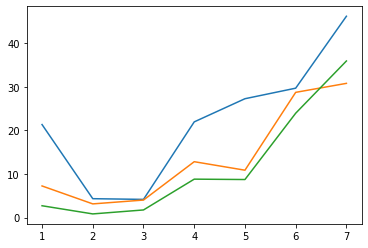

In [10]:
plt.plot(twins["has_superstructure_cement_mortar_brick"])
plt.plot(twins["has_superstructure_rc_non_engineered"])
plt.plot(twins["has_superstructure_rc_engineered"])

Some superstructures are correlated with the number of floors.

Superstructure X Count floors - divided by superstructure

In [11]:
col1 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col2 = np.sort(df['count_floors_pre_eq'].unique()[:7])
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['count_floors_pre_eq'] == c ][i].sum()/len(df[df[i] == 1 ])*100
twins

,1,2,3,4,5,6,7
has_superstructure_adobe_mud,7.52781,47.8551,31.964,8.85243,3.59292,0.190468,0.0173153
has_superstructure_mud_mortar_stone,11.3819,65.8523,22.3715,0.315772,0.0689964,0.00755435,0.00151087
has_superstructure_stone_flag,17.1566,69.7888,12.194,0.570023,0.223539,0.0558847,0.0111769
has_superstructure_cement_mortar_stone,22.0328,55.7239,17.6768,2.81987,1.40993,0.273569,0.0631313
has_superstructure_mud_mortar_brick,10.4555,33.3934,28.9173,18.5012,8.24278,0.444795,0.0450425
has_superstructure_cement_mortar_brick,43.9664,34.6062,11.8328,6.06679,3.12006,0.316085,0.0917665
has_superstructure_timber,14.775,67.5922,15.3484,1.54703,0.693755,0.0391272,0.00451467
has_superstructure_bamboo,18.737,68.0283,11.9617,0.907285,0.356595,0.00902772,0
has_superstructure_rc_non_engineered,26.4258,44.3193,20.146,6.26183,2.1984,0.540589,0.108118
has_superstructure_rc_engineered,26.5667,31.9623,23.5906,11.5654,4.74232,1.20977,0.338737


I expected some superstructures to be used only with high-leveled buildings, but it is not the case.

Superstructure X Age - divided by age

In [12]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['age'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['age'] == i ][c].sum()/len(df[df["age"] == i ])*100
twins

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,2.69575,58.5538,3.16808,3.11432,1.87397,18.1214,25.9821,10.5872,9.5004,5.37614,2.07749
5,3.90836,67.0119,3.18129,2.6857,2.56996,14.1378,27.9342,10.3926,7.23803,3.64424,1.58174
10,5.1342,76.8845,3.43223,1.85366,3.2754,8.51759,27.4964,9.47398,4.57116,1.87423,1.24691
15,5.89003,82.1827,3.61289,1.83005,3.8406,5.83727,26.8176,8.75868,3.599,1.09414,1.43016
20,8.31831,83.1552,3.28444,1.71835,5.03387,5.23895,24.9922,7.98894,3.06693,0.640109,1.34858
25,10.568,84.6754,3.3202,1.49388,6.38184,3.33662,24.3577,7.88804,2.6184,0.270869,1.5062
30,12.3197,82.8766,3.20612,1.25915,9.25782,3.43909,23.0641,6.74506,2.19658,0.232971,1.5365
35,14.5378,82.3343,3.36134,1.26984,11.6153,2.7451,23.6228,7.80579,2.36228,0.140056,1.80205
40,15.7117,80.5948,3.55147,0.994412,11.8951,2.68965,22.2559,6.279,1.97935,0.113647,1.49635
45,15.623,81.9571,4.4152,1.12503,11.8234,1.93165,23.3284,7.38697,1.76183,0.0636807,2.10146


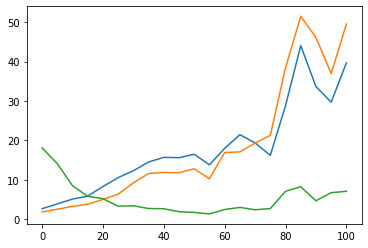

In [13]:
plt.plot(twins.loc[:100,"has_superstructure_adobe_mud"])
plt.plot(twins.loc[:100,"has_superstructure_mud_mortar_brick"])
plt.plot(twins.loc[:100,"has_superstructure_cement_mortar_brick"])

Some superstructures are clearly archaics now - like adobe mud or mud mortar brick - while other are becoming more common.

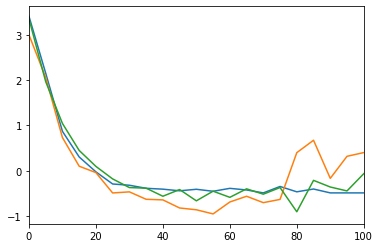

In [14]:
col = "age"
dmgs = df.merge(damages, right_index=True, left_index=True).loc[:,[col,'damage_grade']]
cmap = pd.DataFrame(columns=np.arange(0,105,5), index=np.arange(1,4)).fillna(0)
for i in cmap.columns:
    cmap[i] = dmgs[dmgs[col] == i]['damage_grade'].value_counts().sort_index()/len(dmgs[dmgs[col] == i])
cmap = cmap.T.fillna(0)
expected_value = pd.Series(index=cmap.index)
for i in expected_value.index:
    expected_value.loc[i] = cmap.loc[i,1]+cmap.loc[i,2]*2+cmap.loc[i,3]*3
s1 = twins.loc[:100,"has_superstructure_rc_engineered"]
s1 = (s1 - s1.mean()) / s1.std()
s2 = twins.loc[:100,"has_superstructure_cement_mortar_brick"]
s2 = (s2 - s2.mean()) / s2.std()
s3 = (expected_value.mean() - expected_value) / expected_value.std()
s1.plot()
s2.plot()
s3.plot()

I already knew from previous exploration that RC engineered and cement mortar brick structure are the most resilient - here is an illustration, where percentage of this features per year are highly correlated with expected value of damages. 

Superstructure X Area percentage (binned) - divided by area percentage

In [15]:
col1 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
twins = pd.DataFrame(index=np.arange(10,110,10), columns=col1)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['area_percentage'].isin(np.arange(i-9,i+1))][c].sum()/len(df[df["area_percentage"].isin(np.arange(i-9,i+1))])*100
twins

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
10,8.39455,80.7068,3.44854,1.35886,6.04838,5.03748,26.5788,8.85002,2.54185,0.464425,1.42628
20,11.1674,59.2058,3.44154,3.69823,10.0384,16.8488,21.5261,7.28289,10.8085,5.41333,1.81504
30,9.00515,31.1893,2.68725,5.8319,11.6066,33.9051,13.9508,4.2024,21.2979,15.952,1.97256
40,7.35736,20.8709,1.8018,4.35435,12.1622,34.985,10.5105,2.85285,22.2222,22.2222,1.65165
50,6.36943,22.293,3.82166,3.82166,7.64331,30.5732,8.28025,2.54777,21.6561,22.293,0
60,2.53165,30.3797,1.26582,0,11.3924,34.1772,13.9241,1.26582,13.9241,16.4557,0
70,2.12766,36.1702,6.38298,4.25532,8.51064,19.1489,23.4043,4.25532,14.8936,12.766,0
80,13.6364,50,4.54545,4.54545,4.54545,27.2727,22.7273,9.09091,13.6364,9.09091,4.54545
90,0,58.8235,5.88235,0,5.88235,29.4118,29.4118,17.6471,11.7647,0,0
100,25,0,0,0,0,0,0,0,0,75,0


There is no obvious relation between superstructure and area percentage of buildings

Superstructure X percentage (binned) - divided by height percentage

In [16]:
col1 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
twins = pd.DataFrame(index=np.arange(10,40,10), columns=col1)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['height_percentage'].isin(np.arange(i-9,i+1))][c].sum()/len(df[df["height_percentage"].isin(np.arange(i-9,i+1))])*100
twins

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
10,8.75374,77.0262,3.43712,1.79553,6.46336,7.23848,25.6902,8.56132,3.98017,1.34383,1.50632
20,17.9012,10.1543,3.24074,4.04321,35,30.3086,11.1111,4.01235,26.2346,20.4012,0.925926
30,5.71429,20,0,5.71429,0,31.4286,5.71429,0,28.5714,42.8571,0


As expected, higher buildings are most likely to use RC engineered and non-engineered.

Superstructure X Land surface condition  - divided by sufrace condition

In [17]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['land_surface_condition'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['land_surface_condition'] == i ][c].sum()/len(df[df["land_surface_condition"] == i ])*100
twins

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
n,8.48345,84.2153,5.34227,2.15323,3.61968,3.92085,29.2868,10.1075,3.81671,0.79937,2.52758
o,5.79606,81.6859,5.12266,2.44108,1.86388,4.43723,32.4315,11.7124,5.24291,0.817701,2.03223
t,9.04469,74.6679,3.0555,1.74573,7.52917,8.23641,24.6119,8.11462,4.29375,1.74435,1.3093


Each superstructure is quite uniformly distributed in each land surface condition and we can not draw any conclusion out of this tab.

Superstructure X Foundation type  - divided by foundation type

In [18]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['foundation_type'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['foundation_type'] == i ][c].sum()/len(df[df["foundation_type"] == i ])*100
twins

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
h,15.6768,15.0552,37.0856,1.38122,3.24586,9.39227,53.2459,12.3619,2.00276,0.276243,19.268
i,0.330844,1.79601,0.378108,6.03082,1.42736,39.1152,2.23083,0.406466,53.2659,34.4361,0.321391
r,10.0764,86.1695,3.54569,0.995912,7.59457,2.8787,23.1104,6.85186,1.71947,0.049271,1.32484
u,2.80505,30.021,2.25105,12.3562,5.07013,54.9369,16.7742,3.93408,8.82889,2.6087,1.81627
w,2.32835,33.0202,1.83225,0.98558,1.27662,7.91771,81.9817,42.0161,2.69216,0.0396878,2.83768


Foundation type i is used with the best superstructure : cement mortar brick in 39.1% of case, real concrete engineered or non-engineered in at least 53,2% of case.

Superstructure X Roof type  - divided by roof type

In [19]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['roof_type'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['roof_type'] == i ][c].sum()/len(df[df["roof_type"] == i ])*100
twins

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
n,10.1098,81.3292,3.68132,1.6878,7.19747,4.87415,25.5155,8.06926,1.87101,0.102274,1.63857
q,6.68767,79.9922,3.49487,1.10433,5.25692,4.08926,31.2557,11.8942,2.15181,0.0341042,1.28622
x,3.0773,3.71377,0.395477,6.09281,8.4286,50.5778,3.40481,0.469629,39.2572,24.2538,0.722981


Roof type x is used with the best superstructure : cement mortar brick in 50.6% of case, real concrete engineered or non-engineered in at least 39.2% of case.

Superstructure X Ground floor type - divided by ground floor type

In [20]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['ground_floor_type'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['ground_floor_type'] == i ][c].sum()/len(df[df["ground_floor_type"] == i ])*100
twins

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
f,9.73051,84.2257,3.37994,0.899728,6.44837,1.49128,26.9107,9.58072,1.68162,0.0372104,1.48603
m,12.4016,45.0787,5.90551,10.6299,16.9291,27.5591,21.4567,4.72441,5.70866,1.37795,8.85827
v,1.93144,11.8408,0.89863,7.41268,6.3636,54.4098,12.4629,2.40312,26.9467,15.602,1.23612
x,8.65458,74.5428,4.92021,3.84291,10.3389,11.8181,25.6341,5.55935,3.56956,0.824054,1.68027
z,1.29482,32.1713,38.5458,3.28685,2.09163,2.78884,48.7052,7.27092,2.98805,0.59761,2.29084


Ground floor type v is used with the best superstructures : cement mortar brick and real concrete engineered or non-engineered. In the other hand, ground floor type f is associated with the worst superstructures.

Superstructure X Other floor type - divided by other floor type

In [21]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['other_floor_type'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['other_floor_type'] == i ][c].sum()/len(df[df["other_floor_type"] == i ])*100
twins

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
j,4.32447,55.4527,3.80995,2.56005,4.62064,21.4868,24.466,10.4033,7.21582,2.68303,2.22875
q,9.8099,86.736,2.23376,1.1072,7.23067,1.71646,24.0795,8.30338,1.23728,0.0163357,1.23486
s,2.3279,5.13801,0.498836,6.94214,7.998,50.2328,3.55836,0.473894,38.56,25.0333,0.748254
x,11.241,74.779,8.46299,2.45581,6.92092,5.00598,37.9189,9.73117,3.54677,0.0598416,2.03922


Superstructure X plan configuration - divided by plan configuration

In [22]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['plan_configuration'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['plan_configuration'] == i ][c].sum()/len(df[df["plan_configuration"] == i ])*100
twins

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
a,4.7619,55.5556,1.98413,1.5873,4.36508,16.2698,40.4762,15.4762,7.93651,3.57143,6.74603
c,5.23077,42.1538,0.923077,4,12.3077,25.8462,23.3846,2.15385,21.2308,12,2.46154
d,8.72669,77.1618,3.42181,1.75669,6.65008,7.04117,25.4819,8.45876,4.08842,1.49677,1.45758
f,13.6364,77.2727,0,4.54545,13.6364,0,31.8182,13.6364,9.09091,0,4.54545
m,19.5652,32.6087,4.34783,2.17391,30.4348,28.2609,19.5652,4.34783,8.69565,6.52174,2.17391
n,5.26316,76.3158,2.63158,0,5.26316,7.89474,28.9474,5.26316,0,5.26316,2.63158
o,5.66038,40.2516,7.54717,5.03145,11.3208,23.8994,35.2201,13.8365,13.2075,3.14465,1.88679
q,12.1574,61.6831,4.86648,2.93394,7.88826,12.7723,20.8363,7.46662,6.95713,3.68939,2.21363
s,13.0058,55.7803,5.20231,4.04624,8.09249,19.0751,39.5954,18.7861,7.80347,2.89017,2.60116
u,13.4009,40.9701,1.97314,4.13812,15.5111,28.3639,31.3237,11.9485,9.208,3.06933,2.57605


# Principal component analysis

In [23]:
from sklearn.decomposition import PCA

In [24]:
dfull = pd.read_csv('Datasets/train_full_processed.csv', index_col=0)

In [25]:
variance = []
for d in range(1, len(dfull.columns)):
    pca = PCA(n_components=d)
    pca.fit(dfull)
    variance.append(pca.explained_variance_ratio_.sum())

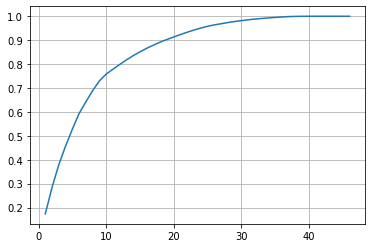

In [26]:
plt.grid()
plt.yticks(np.arange(0,11)/10)
plt.plot(range(1, len(dfull.columns)), variance)

The elbow on this curve is really soft... I won't use the PCA dimensionality reduction unless my computation times are very long.